In [1]:
# ! pip install yfinance
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

# Get data from yahoo finance
sd = dt.datetime(1998,12,4)
ed = dt.datetime(2023,2,23)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
# 2x leveraged nasdaq 100 etf
qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)
# 3x leveraged nasdaq 100 etf
tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)
#nasdaq 100 index
ndx = ab.StockData('NDX')
ndx.get_data_from_yfinance('NDX', sd, ed)
#S&P 500 etf
spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY', sd, ed)
#nasdaq stocks above 200 day moving average percentage
naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
#buy and hold strategy vs various  strategies
def backtestAll(ticker:ab.StockData,test_start:dt.datetime,test_end:dt.datetime, verbose = True):
    perf_summary = pd.DataFrame()
    buy_and_hold = ab.BuyAndHold() 
    buy_and_hold.run_strategy(ticker, test_start,test_end)
    bt = ab.BackTest(test_start, test_end)
    bt.run_backtest(buy_and_hold, ticker)

    macross_strategy = ab.MACross(50, 200)
    macross_strategy.run_strategy(ticker, test_start ,test_end)
    ma_cross_bt = ab.BackTest(test_start, test_end)
    ma_cross_bt.run_backtest(macross_strategy, ticker)

    threshold_strategy = ab.Threshold(signal_data = naa200r, name='NAA200R', indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
    threshold_strategy.run_strategy(ticker, test_start , test_end)
    naa200r_threshold_bt = ab.BackTest(test_start , test_end)
    naa200r_threshold_bt.run_backtest(threshold_strategy, ticker)

    ma_threshold = ab.MAThreshold('SMA200', ma_window = 200,buy_threshold = 1.05, sell_threshold = 0.95)
    ma_threshold.run_strategy(ticker, test_start,test_end)
    ma_threshold_bt = ab.BackTest(test_start, test_end)
    ma_threshold_bt.run_backtest(ma_threshold, ticker)

    ma_threshold2 = ab.MAThreshold('SMA200', ma_window = 200,buy_threshold = 1.03, sell_threshold = 0.95)
    ma_threshold2.run_strategy(ticker, test_start,test_end)
    ma_threshold2_bt = ab.BackTest(test_start, test_end)
    ma_threshold2_bt.run_backtest(ma_threshold2, ticker)
    
    WeeklyMAThreshold = ab.WeeklyMAThreshold('2W SMA200', ma_window =40,buy_threshold=1,sell_threshold=1)
    WeeklyMAThreshold.run_strategy(ticker, test_start , test_end)
    WeeklyMAThreshold_bt = ab.BackTest(test_start , test_end)
    WeeklyMAThreshold_bt.run_backtest(WeeklyMAThreshold, ticker)

    print('Backtest for', ticker.ticker)
    bt.performance_summary()
    ma_cross_bt.performance_summary()
    naa200r_threshold_bt.performance_summary()
    ma_threshold_bt.performance_summary()
    ma_threshold2_bt.performance_summary()
    WeeklyMAThreshold_bt.performance_summary()
    
    fig = plt.figure(figsize=(16,4))
    plt.plot(bt.balance['Date'], bt.balance['Total'], label = bt.name ,color = 'blue')
    plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'], label = ma_cross_bt.name, color = 'red')
    plt.plot(naa200r_threshold_bt.balance['Date'], naa200r_threshold_bt.balance['Total'], label = naa200r_threshold_bt.name, color = 'green')
    plt.plot(ma_threshold_bt.balance['Date'], ma_threshold_bt.balance['Total'], label = ma_threshold_bt.name)
    plt.plot(ma_threshold2_bt.balance['Date'], ma_threshold2_bt.balance['Total'], label = ma_threshold2_bt.name)
    plt.plot(WeeklyMAThreshold_bt.balance['Date'], WeeklyMAThreshold_bt.balance['Total'], label = WeeklyMAThreshold_bt.name)
 
    plt.legend()
    plt.title('Backtesting for {}'.format(ticker.ticker))
    plt.show()


    for strategy in [bt,ma_cross_bt,naa200r_threshold_bt, ma_threshold_bt, ma_threshold2_bt, WeeklyMAThreshold_bt]:
        perf_summary = pd.concat([perf_summary, strategy.summary_result])
        
    return perf_summary


No action on this strategy
Backtest for QQQ

        
        Performance Summary of Buy and Hold: 
        cumulative return:36.13%, 
        sharp_ratio: 3.03%, 
        max_drawdown: -35.52%, 
        average of daily return:0.0563%, 
        std of daily return: 1.8570%,
        number of trades: 2,
        trading days: 1155,
        annual return: -18.4237%

        
        

        
        Performance Summary of 50 200/200: 
        cumulative return:-100.00%, 
        sharp_ratio: nan%, 
        max_drawdown: -100.00%, 
        average of daily return:-100.0000%, 
        std of daily return: nan%,
        number of trades: 1,
        trading days: 1155,
        annual return: nan%

        
        

        
        Performance Summary of NAA200R 15/30 MA 20: 
        cumulative return:54.17%, 
        sharp_ratio: 4.72%, 
        max_drawdown: -23.33%, 
        average of daily return:0.0640%, 
        std of daily return: 1.3558%,
        number of trades: 14,
        tr

c:\Users\zw627\Downloads\backtesting\Ab.py:363: RuntimeWarning: invalid value encountered in power
  self.annual_return = np.power(self.cumulative_return.values[0], 1/round((trading_dates.days/252)))


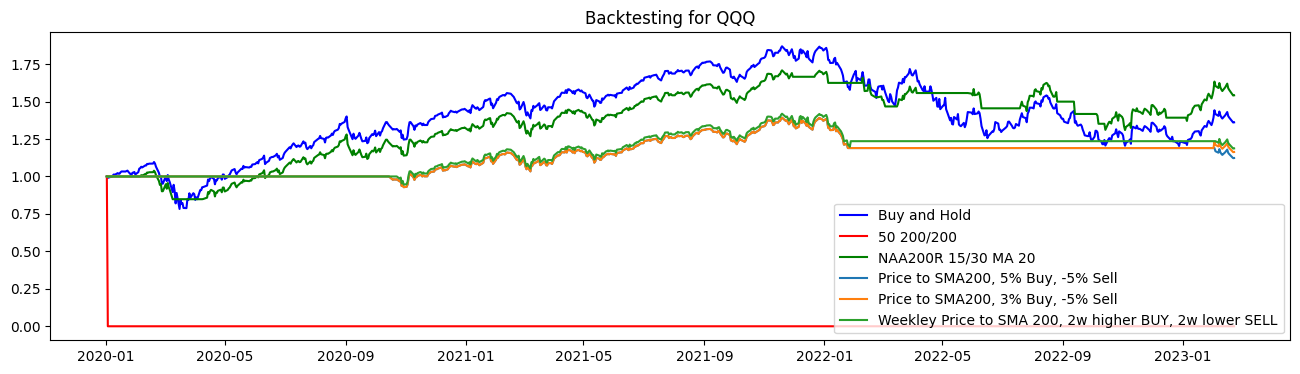

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,0.361260,-0.184237,-0.355207,0.030344,0.000563,0.018570,1155
0,50 200/200,1,-1.000000,NaN,-1.000000,NaN,-1.000000,NaN,1155
0,NAA200R 15/30 MA 20,14,0.541694,-0.115392,-0.233286,0.047214,0.000640,0.013558,1155
0,SMA200 1.05/0.95 MA 200,3,0.122953,-0.342421,-0.145746,0.022498,0.000178,0.007919,1155
0,SMA200 1.03/0.95 MA 200,3,0.163256,-0.304057,-0.145746,0.027878,0.000224,0.008021,1155
0,2W SMA200 1/1 MA 40,3,0.187373,-0.284613,-0.155672,0.031309,0.000249,0.007955,1155


In [3]:
test_start = dt.datetime(2020,1,1) # dt.datetime(2003,3,10)
test_end = dt.datetime(2023,3,1)

perf_summary = backtestAll(qqq, test_start, test_end, verbose = False)
display(perf_summary)

No action on this strategy
Backtest for QLD

        
        Performance Summary of Buy and Hold: 
        cumulative return:33.45%, 
        sharp_ratio: 2.86%, 
        max_drawdown: -63.19%, 
        average of daily return:0.1067%, 
        std of daily return: 3.7263%,
        number of trades: 2,
        trading days: 1155,
        annual return: -19.6698%

        
        

        
        Performance Summary of 50 200/200: 
        cumulative return:-100.00%, 
        sharp_ratio: nan%, 
        max_drawdown: -100.00%, 
        average of daily return:-100.0000%, 
        std of daily return: nan%,
        number of trades: 1,
        trading days: 1155,
        annual return: nan%

        
        

        
        Performance Summary of NAA200R 15/30 MA 20: 
        cumulative return:97.82%, 
        sharp_ratio: 4.55%, 
        max_drawdown: -43.97%, 
        average of daily return:0.1234%, 
        std of daily return: 2.7116%,
        number of trades: 14,
        tr

c:\Users\zw627\Downloads\backtesting\Ab.py:363: RuntimeWarning: invalid value encountered in power
  self.annual_return = np.power(self.cumulative_return.values[0], 1/round((trading_dates.days/252)))


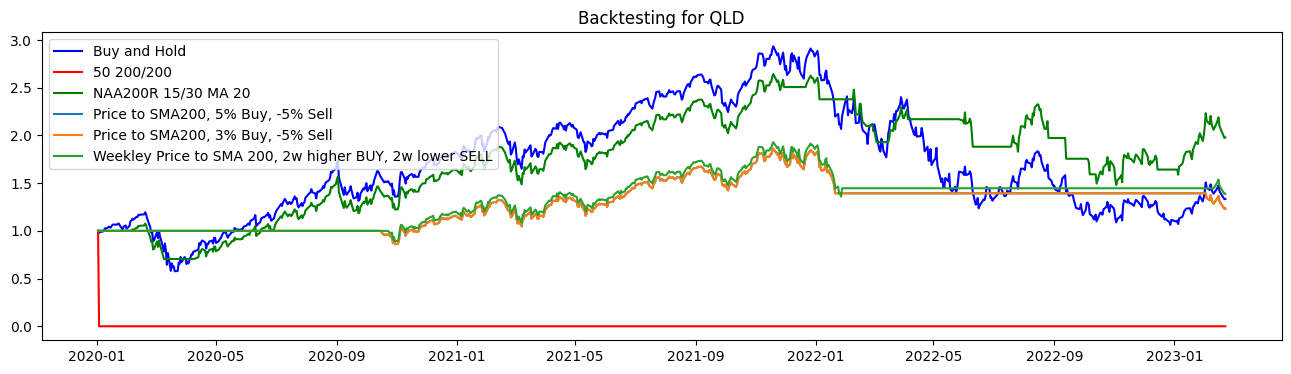

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,0.334498,-0.196698,-0.631892,0.028643,0.001067,0.037263,1155
0,50 200/200,1,-1.000000,NaN,-1.000000,NaN,-1.000000,NaN,1155
0,NAA200R 15/30 MA 20,14,0.978213,-0.004396,-0.439676,0.045493,0.001234,0.027116,1155
0,SMA200 1.05/0.95 MA 200,3,0.234317,-0.251898,-0.250920,0.024815,0.000391,0.015748,1155
0,SMA200 1.03/0.95 MA 200,3,0.234317,-0.251898,-0.250920,0.024815,0.000391,0.015748,1155
0,2W SMA200 1/1 MA 40,3,0.389652,-0.171800,-0.295302,0.034308,0.000541,0.015778,1155


In [4]:
perf_summary = backtestAll(qld, test_start, test_end, verbose = False)
display(perf_summary)

No action on this strategy
Backtest for TQQQ

        
        Performance Summary of Buy and Hold: 
        cumulative return:-1.50%, 
        sharp_ratio: 2.77%, 
        max_drawdown: -81.11%, 
        average of daily return:0.1516%, 
        std of daily return: 5.4838%,
        number of trades: 2,
        trading days: 1155,
        annual return: nan%

        
        

        
        Performance Summary of 50 200/200: 
        cumulative return:-100.00%, 
        sharp_ratio: nan%, 
        max_drawdown: -100.00%, 
        average of daily return:-100.0000%, 
        std of daily return: nan%,
        number of trades: 1,
        trading days: 1155,
        annual return: nan%

        
        

        
        Performance Summary of NAA200R 15/30 MA 20: 
        cumulative return:126.78%, 
        sharp_ratio: 4.61%, 
        max_drawdown: -59.61%, 
        average of daily return:0.1855%, 
        std of daily return: 4.0232%,
        number of trades: 14,
        tradi

c:\Users\zw627\Downloads\backtesting\Ab.py:363: RuntimeWarning: invalid value encountered in power
  self.annual_return = np.power(self.cumulative_return.values[0], 1/round((trading_dates.days/252)))
c:\Users\zw627\Downloads\backtesting\Ab.py:363: RuntimeWarning: invalid value encountered in power
  self.annual_return = np.power(self.cumulative_return.values[0], 1/round((trading_dates.days/252)))


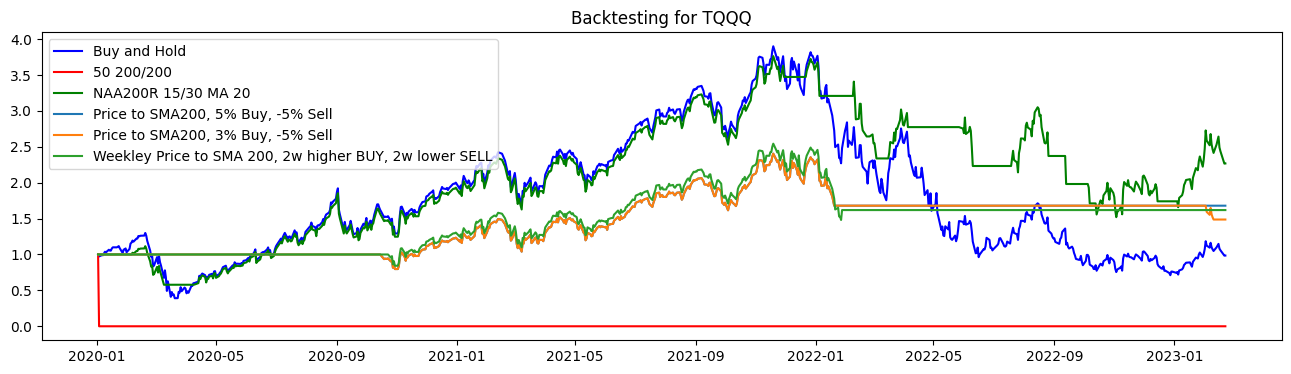

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,-0.014971,NaN,-0.811138,0.027651,0.001516,0.054838,1155
0,50 200/200,1,-1.000000,NaN,-1.000000,NaN,-1.000000,NaN,1155
0,NAA200R 15/30 MA 20,14,1.267789,0.048599,-0.596052,0.046112,0.001855,0.040232,1155
0,SMA200 1.05/0.95 MA 200,2,0.679696,-0.074316,-0.304332,0.040442,0.000912,0.022540,1155
0,SMA200 1.03/0.95 MA 200,3,0.486821,-0.134088,-0.304332,0.033437,0.000764,0.022858,1155
0,2W SMA200 1/1 MA 40,2,0.618665,-0.091571,-0.417862,0.037998,0.000877,0.023085,1155


In [5]:
perf_summary = backtestAll(tqqq, test_start, test_end, verbose = False)
display(perf_summary)

No action on this strategy
Backtest for SPY

        
        Performance Summary of Buy and Hold: 
        cumulative return:22.68%, 
        sharp_ratio: 2.44%, 
        max_drawdown: -34.10%, 
        average of daily return:0.0381%, 
        std of daily return: 1.5602%,
        number of trades: 2,
        trading days: 1155,
        annual return: -25.6782%

        
        

        
        Performance Summary of 50 200/200: 
        cumulative return:-100.00%, 
        sharp_ratio: nan%, 
        max_drawdown: -100.00%, 
        average of daily return:-100.0000%, 
        std of daily return: nan%,
        number of trades: 1,
        trading days: 1155,
        annual return: nan%

        
        

        
        Performance Summary of NAA200R 15/30 MA 20: 
        cumulative return:29.12%, 
        sharp_ratio: 3.57%, 
        max_drawdown: -19.24%, 
        average of daily return:0.0381%, 
        std of daily return: 1.0674%,
        number of trades: 14,
        tr

c:\Users\zw627\Downloads\backtesting\Ab.py:363: RuntimeWarning: invalid value encountered in power
  self.annual_return = np.power(self.cumulative_return.values[0], 1/round((trading_dates.days/252)))


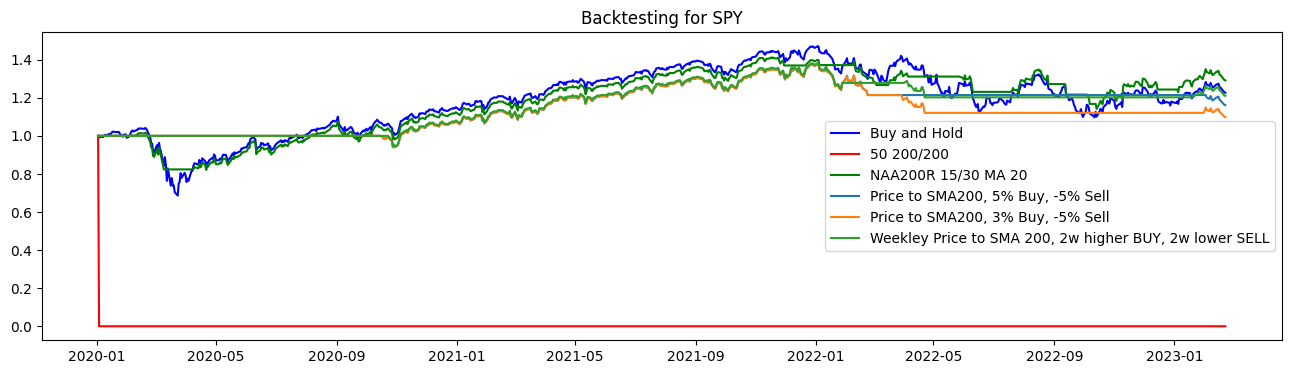

,name,num_trades,cumulative_return,annual_return,max_drawdown,sharp_ratio,avg_daily_return,std_daily_return,num_trading_days
0,Buy and Hold,2,0.226768,-0.256782,-0.341047,0.024422,0.000381,0.015602,1155
0,50 200/200,1,-1.000000,NaN,-1.000000,NaN,-1.000000,NaN,1155
0,NAA200R 15/30 MA 20,14,0.291218,-0.218653,-0.192412,0.035677,0.000381,0.010674,1155
0,SMA200 1.05/0.95 MA 200,3,0.161104,-0.305901,-0.116723,0.033949,0.000208,0.006122,1155
0,SMA200 1.03/0.95 MA 200,4,0.098931,-0.370397,-0.184680,0.021844,0.000140,0.006408,1155
0,2W SMA200 1/1 MA 40,4,0.210349,-0.267870,-0.129763,0.042781,0.000260,0.006082,1155


In [6]:
perf_summary = backtestAll(spy, test_start, test_end, verbose = False)
display(perf_summary)